In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols     
from statsmodels.stats.anova import _get_covariance,anova_lm 

# Problem 1A:

**Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.**

1. State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.
2. Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.
3. Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.
4. If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result. (Non-Graded)

In [2]:
df = pd.read_csv('SalaryData.csv')
df.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [4]:
df.shape

(40, 3)

In [5]:
df.isnull().sum()

Education     0
Occupation    0
Salary        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [7]:
df.describe(include='all')

,Education,Occupation,Salary
count,40,40,40.000000
unique,3,4,NaN
top,Doctorate,Prof-specialty,NaN
freq,16,13,NaN
mean,NaN,NaN,162186.875000
std,NaN,NaN,64860.407506
min,NaN,NaN,50103.000000
25%,NaN,NaN,99897.500000
50%,NaN,NaN,169100.000000
75%,NaN,NaN,214440.750000


In [8]:
df.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [9]:
df.Occupation.value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

## 1.1 State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

## ANS

**null and alternate hypothesis for conducting one-way ANOVA for Education with respect to the variable ‘Salary’:**

H0: The means of 'Salary' variable with respect to each type of 'Education' is equal.

𝐻a: At least one of the means of 'Salary' variable with respect to each type of 'Education' is unequal.

**null and alternate hypothesis for conducting one-way ANOVA for Occupation with respect to the variable ‘Salary’:**

H0: The means of 'Salary' variable with respect to each type of 'Occupation' is equal.

𝐻a: At least one of the means of 'Salary' variable with respect to each type of 'Occupation' is unequal.

## 1.2 Perform one-way ANOVA for Education with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

**Testing one way ANOVA for 'Education' variable with 'Salary' variable.**

H0: The means of 'Salary' variable with respect to each type of 'Education' is equal.

𝐻a: At least one of the means of 'Salary' variable with respect to each type of 'Education' is unequal.

In [3]:
formula = 'Salary ~ C(Education)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


**Since the p value in this scenario is less than $\alpha$ (0.05), we can say that we reject the Null Hypothesis ($H_0$)**

<AxesSubplot:xlabel='Education', ylabel='Salary'>

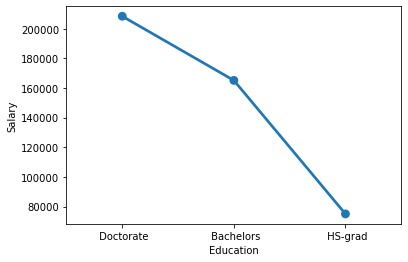

In [11]:
sns.pointplot(x='Education', y='Salary', data=df, ci=None)

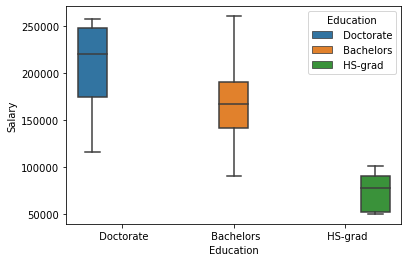

In [14]:
sns.boxplot(x= "Education", y = 'Salary' , data = df, hue = 'Education') 
plt.show()

In [15]:
df.groupby("Education")["Salary"].mean()

Education
 Bachelors    165152.933333
 Doctorate    208427.000000
 HS-grad       75038.777778
Name: Salary, dtype: float64

## 1.3 Perform one-way ANOVA for variable Occupation with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

**Testing one way ANOVA for 'Education' variable with 'Salary' variable.**

H0: The means of 'Salary' variable with respect to each type of 'Occupation' is equal.

𝐻a: At least one of the means of 'Salary' variable with respect to each type of 'Occupation' is unequal.

In [4]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


**Since the p value in this scenario is more than $\alpha$ (0.05), we can say that we fail to reject the Null Hypothesis ($H_0$)**

<AxesSubplot:xlabel='Occupation', ylabel='Salary'>

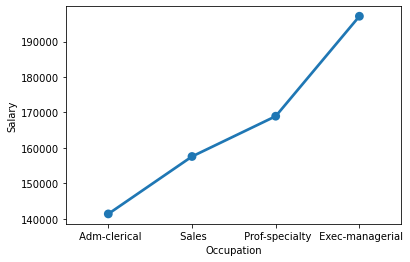

In [12]:
sns.pointplot(x='Occupation', y='Salary', data=df, ci=None)

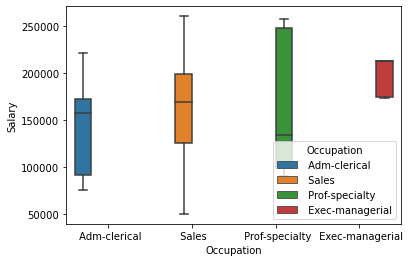

In [16]:
sns.boxplot(x= "Occupation", y = 'Salary' , data = df, hue = 'Occupation') 
plt.show()

In [13]:
df.groupby("Occupation")["Salary"].mean()

Occupation
 Adm-clerical       141424.300000
 Exec-managerial    197117.600000
 Prof-specialty     168953.153846
 Sales              157604.416667
Name: Salary, dtype: float64

## 1.4 If the null hypothesis is rejected in either (1.2) or in (1.3), find out which class means are significantly different. Interpret the result.

**The null hypothesis is rejected in (1.2)**

In [15]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,MultiComparison)

In [16]:
MultiComp=MultiComparison(df['Salary'],df['Education']) 
print(MultiComp.tukeyhsd().summary())

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


**It is clear from the above table that there is a significant difference in mean Salary between all three pairs.**

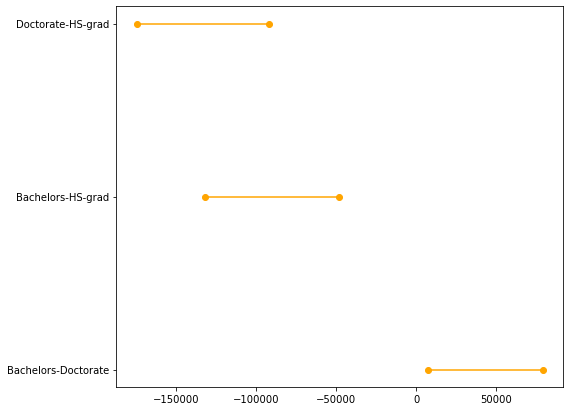

In [18]:
results = MultiComp.tukeyhsd() 
df=results.summary() 
results_as_html = df.as_html() 
df1=pd.read_html(results_as_html, header=0, index_col=0)[0].reset_index() 
groups = np.array([df1.group1+ '-'+ df1.group2]) 
plt.figure(figsize=(8,7)) 
data_dict = {} 
data_dict['category'] = groups.ravel() 
data_dict['lower'] = results.confint[:,0] 
data_dict['upper'] = results.confint[:,1] 
dataset = pd.DataFrame(data_dict) 
for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
    plt.plot((lower,upper),(y,y),'ro-',color='orange') 
plt.yticks(range(len(dataset)),list(dataset['category']));

**From above graph it is evident that the confidence intervals of difference of mean salaries for all the three pairs do not contain zero, therefore these pairs are significantly different from each other.**

# Problem 1B

## 1.5 What is the interaction between the two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.

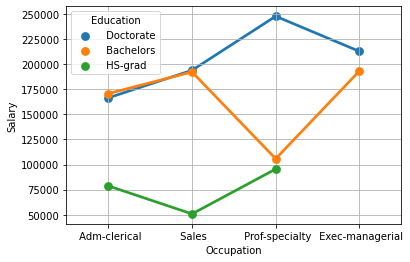

In [18]:
sns.pointplot(x = 'Occupation', y = 'Salary',data=df, hue='Education', ci=None)
plt.grid()
plt.show()

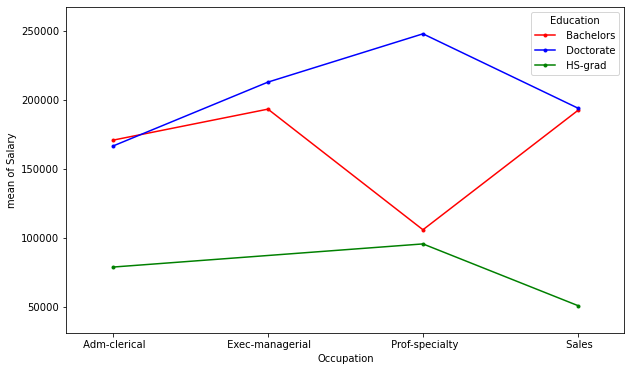

In [8]:
from statsmodels.graphics.factorplots import interaction_plot
fig, ax = plt.subplots(figsize=(10, 6)) 
fig = interaction_plot(x=df['Occupation'], trace=df['Education'], response=df["Salary"],colors=['red', 'blue','green'], ylabel='Salary', xlabel='Occupation',ax=ax) 
plt.show()

**As seen from the above interaction plot, there seems to be very less or almost no interaction amongst the two categorical variables (Occupation and Education). Interaction can be observed only between Doctorate and Bachelor types of Education for the Occupation levels of Adm-clerical and Sales.**

## 1.6 Perform a two-way ANOVA based on the Education and Occupation (along with their interaction Education*Occupation) with the variable ‘Salary’. State the null and alternative hypotheses and state your results. How will you interpret this result?

**Testing two way ANOVA with both 'Education' and 'Occupation' variables with respect to the variable 'Salary'.**

𝐻0  : The means of 'Salary' variable with respect to each Occupation category and Education is equal.

𝐻a  : At least one of the means of 'Salary' variable with respect to each Occupation category and Education is unequal.

In [20]:
formula = 'Salary ~ C(Education) + C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq          F        PR(>F)
C(Education)    2.0  1.026955e+11  5.134773e+10  31.257677  1.981539e-08
C(Occupation)   3.0  5.519946e+09  1.839982e+09   1.120080  3.545825e-01
Residual       34.0  5.585261e+10  1.642724e+09        NaN           NaN


**Considering both the factors (Education and Occupation), Education qualification is a significant factor as the p value is < $\alpha$ (0.05) wheras Occupation level is not a significant variable as p value is > $\alpha$ (0.05).**

In [21]:
model=ols('Salary~C(Education)+C(Occupation)+C(Education):C(Occupation)',data=df).fit()
aov_table=anova_lm(model)
print(aov_table)

                              df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN  


**Considering interaction for both the factors (Education and Occupation), Education qualification still remains a significant factor as the p value is < $\alpha$ (0.05) wheras Occupation level continues to remain insignificant variable as p value is > $\alpha$ (0.05).However, the interaction of both the factors (Education and Occupation) is a significant factor as p value is < $\alpha$ (0.05)**

## 1.7 Explain the business implications of performing ANOVA for this particular case study.

**Business can increase the weightage of salaries offered more based on Occupational experience**

**The salaries could also be reshuffled according to the Occupation experience irrespective of the Education qualification for junior positions to boost moral**

**Business can also try to shuffle positions based on Educational qualifications creating a universal experience parameter where experience in all four types of Occupations are provided to the employees**